# RLab03 - Gabriele Bertinelli (2103359)

In [1]:
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(emdbook)

set.seed(2103359)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




#### 1)  
**1.1)**    

- We assume a *positive uniform* prior $\rightarrow g(\mu)=1$ for $\mu \gt 0$.  
- The likelihood for Poisson process, in case of multiple independent measurements, is $f(\{y_i\}|\mu) = \prod_{i=1}^n f(y_i|\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
- The posterior will be $P(\mu|\{y_i\}) \propto f(\{y_i\}|\mu) \times g(\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
  This is a $Gamma(\alpha, \lambda)$ function with $\alpha = \sum y_i + 1$ and $\lambda = n$.

[1] "Analytical Mean: 3.00"
[1] "Analytical Variance: 0.50"
[1] "Analytical Median: 2.94"

[1] "Numerical Mean: 2.83"
[1] "Numerical Variance: 2.14"
[1] "Numerical Median: 3.00"


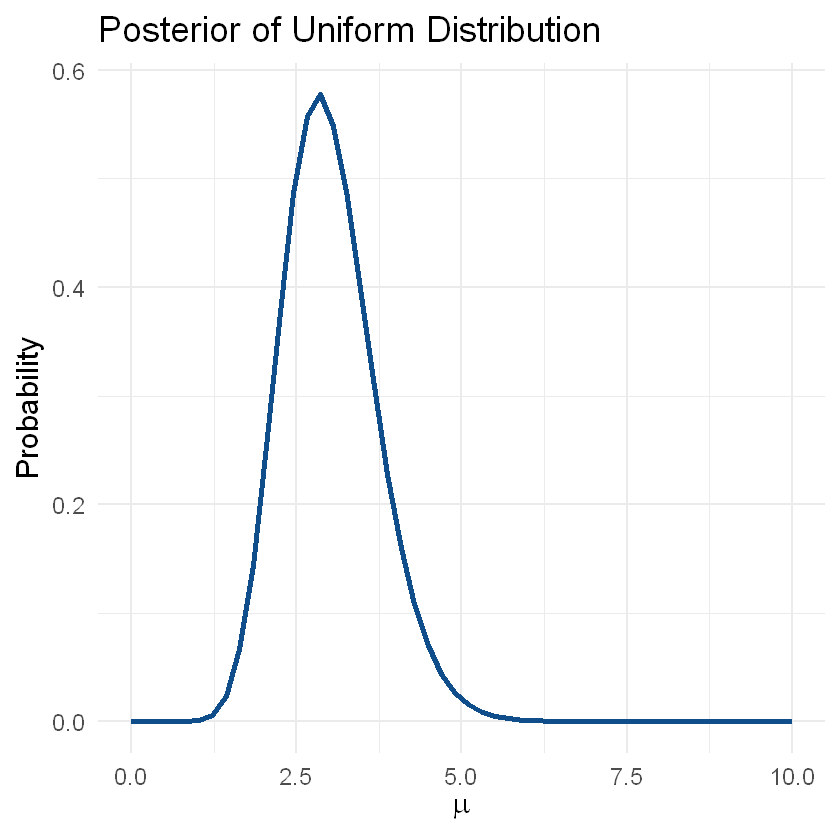

In [3]:
Dt <- 10 # sec
n.parts <- c(4,1,3,1,5,3)

post.alpha <- sum(n.parts) + 1
post.lambda <- length(n.parts)

x <- seq(0, 10, length=50)

unif.post.pdf <- dgamma(x, post.alpha, rate = post.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

unif.plot <- ggplot() +
    geom_line(aes(x=x, y=unif.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Probability") +
	ggtitle("Posterior of Uniform Distribution") +
	theme_minimal(base_size = 18)

unif.plot

a.mean <- post.alpha / post.lambda
a.var <- post.alpha / post.lambda^2
a.median <- qgamma(0.5, post.alpha, rate = post.lambda)

n.mean <- sum(n.parts) / length(n.parts)
n.var <- sum((n.parts - n.mean)^2) / length(n.parts)
n.median <- median(n.parts)

print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))

**1.2)**  

- This time we assume a Gamma prior so that $\mu=\frac{\alpha}{\lambda}=3$ and $\sigma=\sqrt{\frac{\alpha}{\lambda^2}}=1$. In this way the parameters for our Gamma prior will be $\lambda=\frac{3}{1^2}=3$ and $\alpha=\left(\frac{3}{1}\right)^2=9$.  
- The posterior will a $Gamma(\alpha', \lambda')$ function with $\alpha'=\alpha+\sum y_i$ and $\lambda'=\lambda+n$.

[1] "Analytical Mean: 2.89"
[1] "Analytical Variance: 0.32"
[1] "Analytical Median: 2.85"

[1] "Numerical Mean: 2.83"
[1] "Numerical Variance: 2.14"
[1] "Numerical Median: 3.00"


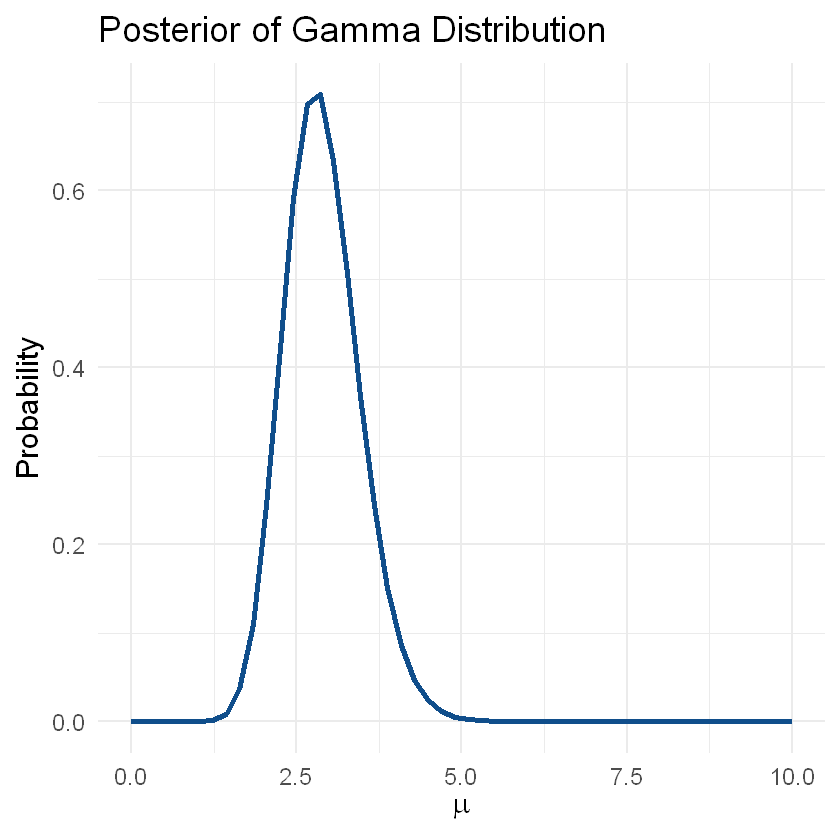

In [4]:
gamma.alpha <- 9 + sum(n.parts)
gamma.lambda <- 3 + length(n.parts)

gamma.post.pdf <- dgamma(x, gamma.alpha, rate = gamma.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

gamma.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Probability") +
	ggtitle("Posterior of Gamma Distribution") +
	theme_minimal(base_size = 18)

gamma.plot

a.mean <- gamma.alpha / gamma.lambda
a.var <- gamma.alpha / gamma.lambda^2
a.median <- qgamma(0.5, gamma.alpha, rate = gamma.lambda)

n.mean <- sum(n.parts) / length(n.parts)
n.var <- sum((n.parts - n.mean)^2) / length(n.parts)
n.median <- median(n.parts)

print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))

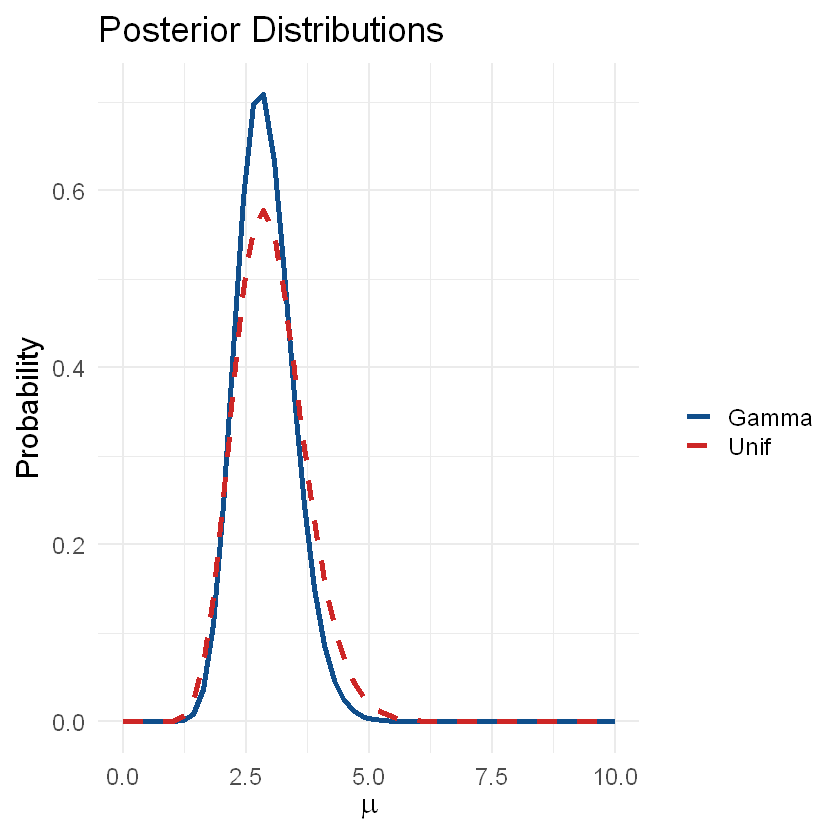

In [5]:
post.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=1.5) +
	geom_line(aes(x=x, y=unif.post.pdf, color='Unif'), lwd=1.5, linetype='dashed') +
	labs(x=TeX(r'(\mu)'), y='Probability', title='Posterior Distributions', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Gamma' = 'dodgerblue4', 'Unif' = 'firebrick3'))

post.plot

**1.3)**

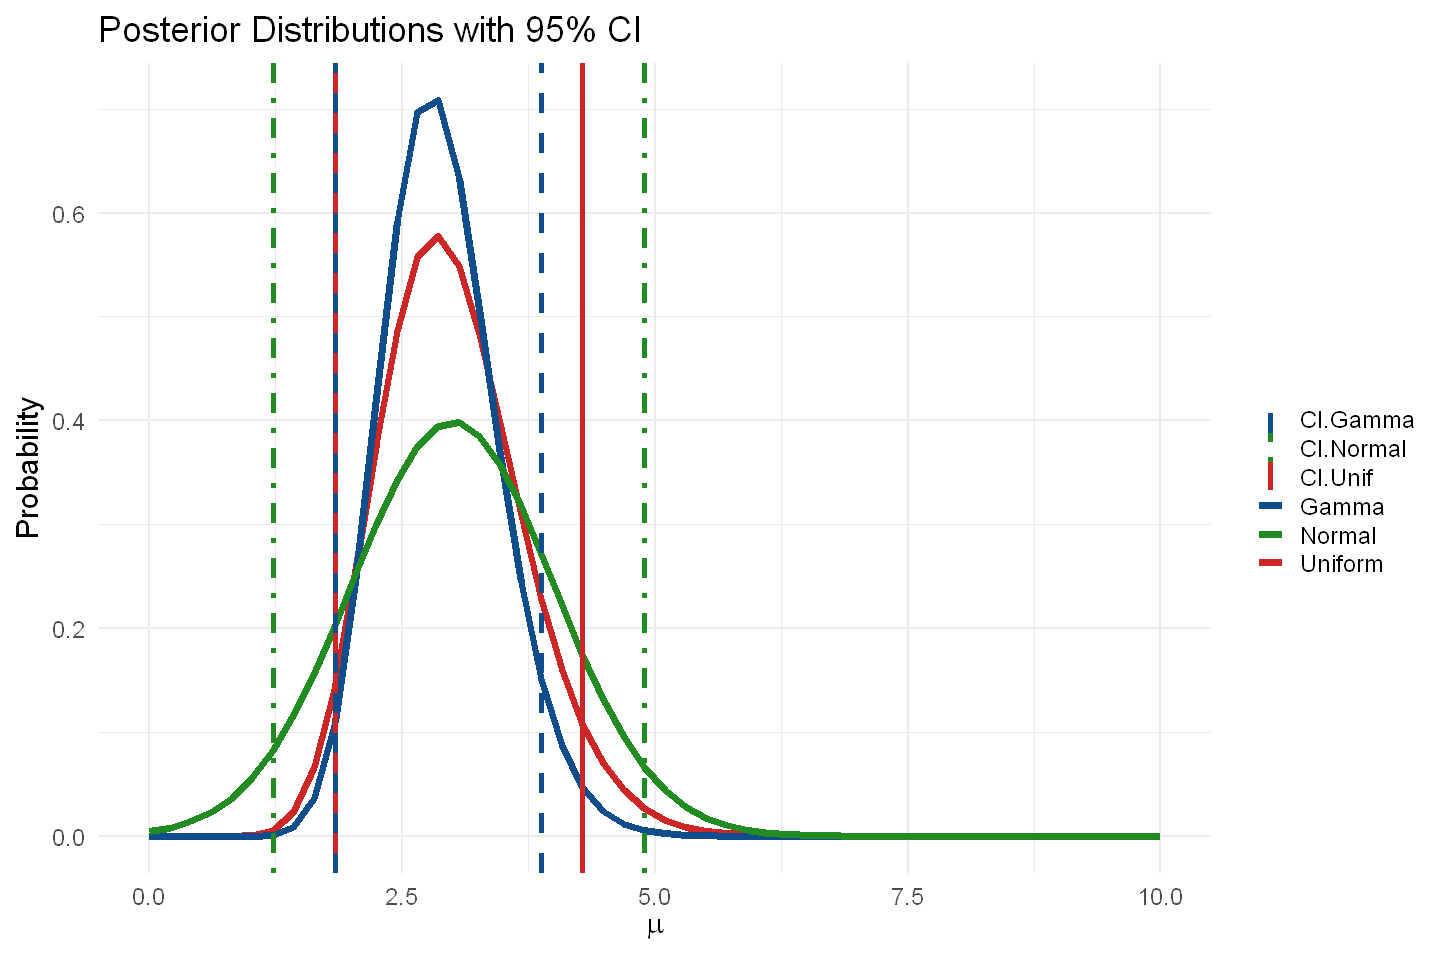

In [35]:
normal.post.pdf <- dnorm(x, mean = 3, sd = 1)

ci.unif <- emdbook::ncredint(x, unif.post.pdf, level=0.95)
ci.gamma <- emdbook::ncredint(x, gamma.post.pdf, level=0.95)
ci.normal <- emdbook::ncredint(x, normal.post.pdf, level=0.95)

options(repr.plot.width = 12, repr.plot.height = 8)

ci.plot <- ggplot() + 
	geom_line(aes(x=x, y=unif.post.pdf, color='Uniform'), lwd=2) +
	geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=2) +
	geom_line(aes(x=x, y=normal.post.pdf, color='Normal'), lwd=2) +
	geom_vline(aes(xintercept = ci.unif[1], color = "CI.Unif"), linewidth = 1.5) +
	geom_vline(aes(xintercept = ci.unif[2], color = 'CI.Unif'), linewidth = 1.5) +

	geom_vline(aes(xintercept = ci.gamma[1], color = "CI.Gamma"), linewidth = 1.5, linetype='dashed') +
	geom_vline(aes(xintercept = ci.gamma[2], color = 'CI.Gamma'), linewidth = 1.5, linetype='dashed') +

	geom_vline(aes(xintercept = ci.normal[1], color = "CI.Normal"), linewidth = 1.5, linetype='dotdash') +
	geom_vline(aes(xintercept = ci.normal[2], color = 'CI.Normal'), linewidth = 1.5, linetype='dotdash') +

	labs(x=TeX(r'(\mu)'), y='Probability', title='Posterior Distributions with 95% CI', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Gamma' = 'dodgerblue4', 'Normal' = 'forestgreen', 
		'CI.Unif' = 'firebrick3', 'CI.Gamma' = 'dodgerblue4', 'CI.Normal' = 'forestgreen'))

ci.plot

#### 2)  
**2.1)**

#### 3)  
**3.1)**  

- If we assume a uniform prior, this corresponds to $Beta(1,1)$. Since Beta prior is a conjugate function for the Binominal distribution, the
  - posterior distribution will be $Beta(a'=a+y, b'=b+n-y)$. With $n=30$ and $y=15$ $\rightarrow Beta(1+15, 1+30-15) = Beta(16, 16)$. 
- We assume now a Beta prior with mean value $m=0.5$ and standard deviation $s=0.1$. Therefore $a=b=12$ $\rightarrow Beta(12,12)$. So the posterior is $Beta(12+15, 12+30-15) = Beta(27,27)$.

- The likelihood is a binomial distribution $P(\{y_i\}|\theta) = \prod_i \theta^{y_i}(1-\theta)^{1-y_i} = P(y, n|\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}$

TableGrob (2 x 2) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]

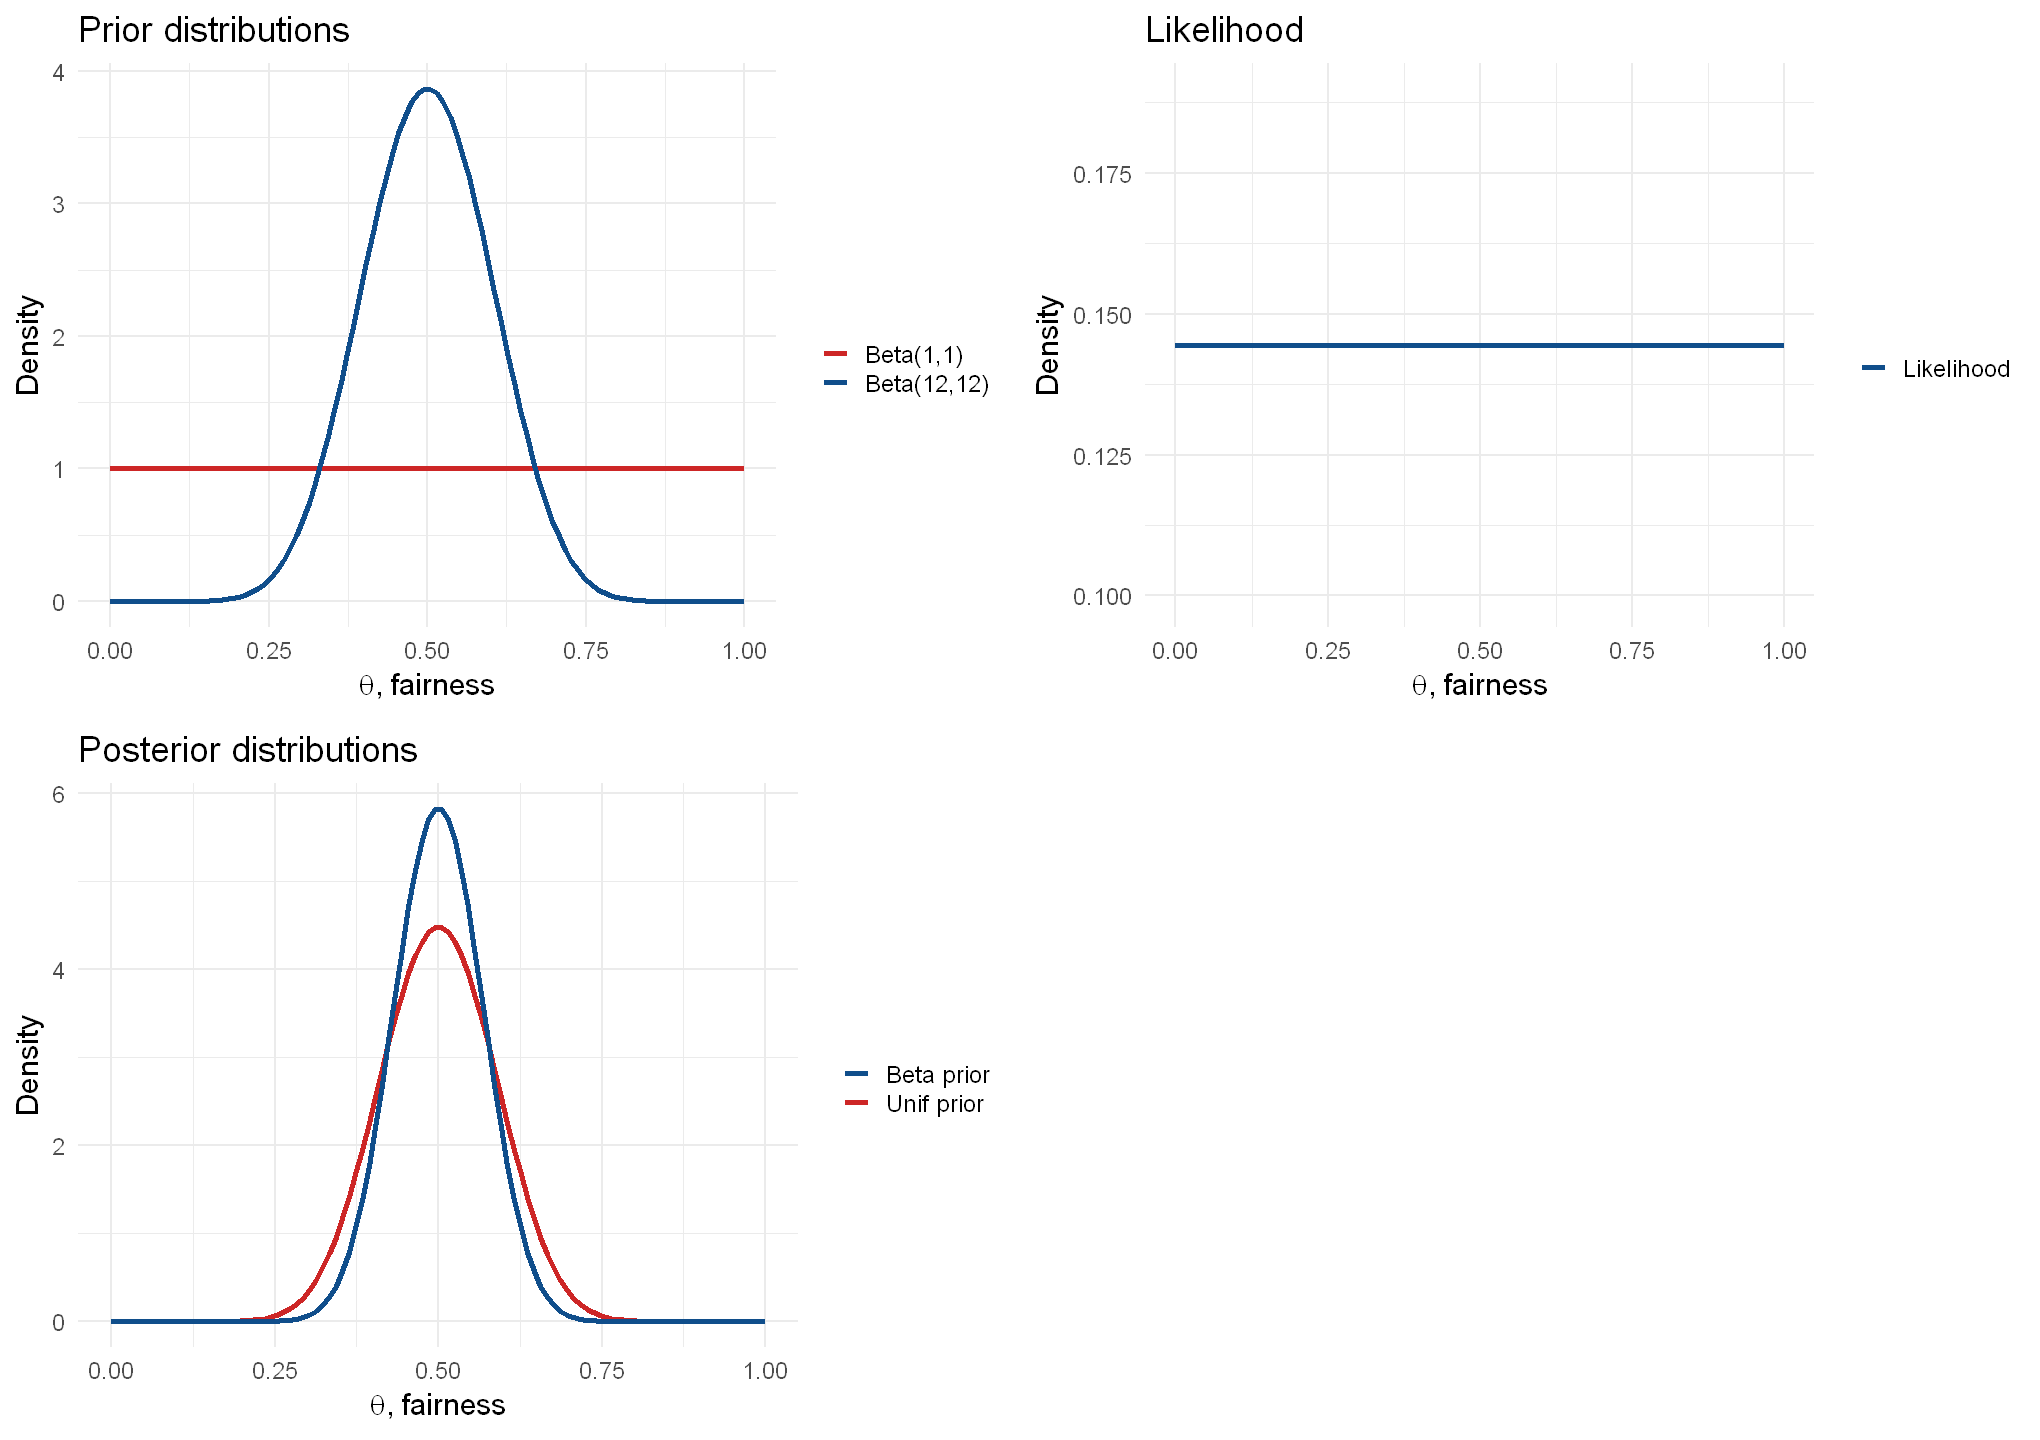

In [20]:
x <- seq(0, 1, length.out = 100)

likelihood <- dbinom(x = 15, size = 30, prob = 0.5)

unif.prior.prior <- dbeta(x=x, shape1=1, shape2=1)
unif.prior.post <- dbeta(x=x, shape1=16, shape2=16)
# unif.prior.post <- unif.prior.prior * likelihood

beta.prior.prior <- dbeta(x=x, shape1=12, shape2=12)
beta.prior.post <- dbeta(x=x, shape1=27, shape2=27)
# beta.prior.post <- beta.prior.prior * likelihood

options(repr.plot.width = 17, repr.plot.height = 12)

coin.prior.plot <- ggplot() + 
	geom_line(aes(x=x, y=unif.prior.prior, color='Beta(1,1)'), lwd=1.5) +
	geom_line(aes(x=x, y=beta.prior.prior, color='Beta(12,12)'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Prior distributions', color='')+ 
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Beta(1,1)' = 'firebrick3', 'Beta(12,12)' = 'dodgerblue4'))

likelihood.plot <- ggplot() + 
	geom_line(aes(x=x, y=likelihood, color='Likelihood'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Likelihood', color='') +
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Likelihood' = 'dodgerblue4'))

coin.post.plot <- ggplot() +
	geom_line(aes(x=x, y=unif.prior.post, color='Unif prior'), lwd=1.5) +
	geom_line(aes(x=x, y=beta.prior.post, color='Beta prior'), lwd=1.5) +
	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Posterior distributions', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Unif prior' = 'firebrick3', 'Beta prior' = 'dodgerblue4'))

combined_plot <- grid.arrange(coin.prior.plot, likelihood.plot, coin.post.plot, nrow=2, ncol = 2)

combined_plot

**3.2)**  
- With the uniform prior, the posterior mean is $\hat{p}=m'=\frac{a'}{a'+b'}=\frac{16}{16+16}$
- With the beta prior, the posterior mean is $\hat{p}=m'=\frac{a'}{a'+b'}=\frac{27}{27+27}$

$\Rightarrow$ The most value coin probability $p$ is the same for both prior and it's $\hat{p}=0.5$.

[1] "95% CI for Uniform prior: [0.33, 0.67]"
[1] "95% CI for Beta prior: [0.37, 0.63]"


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


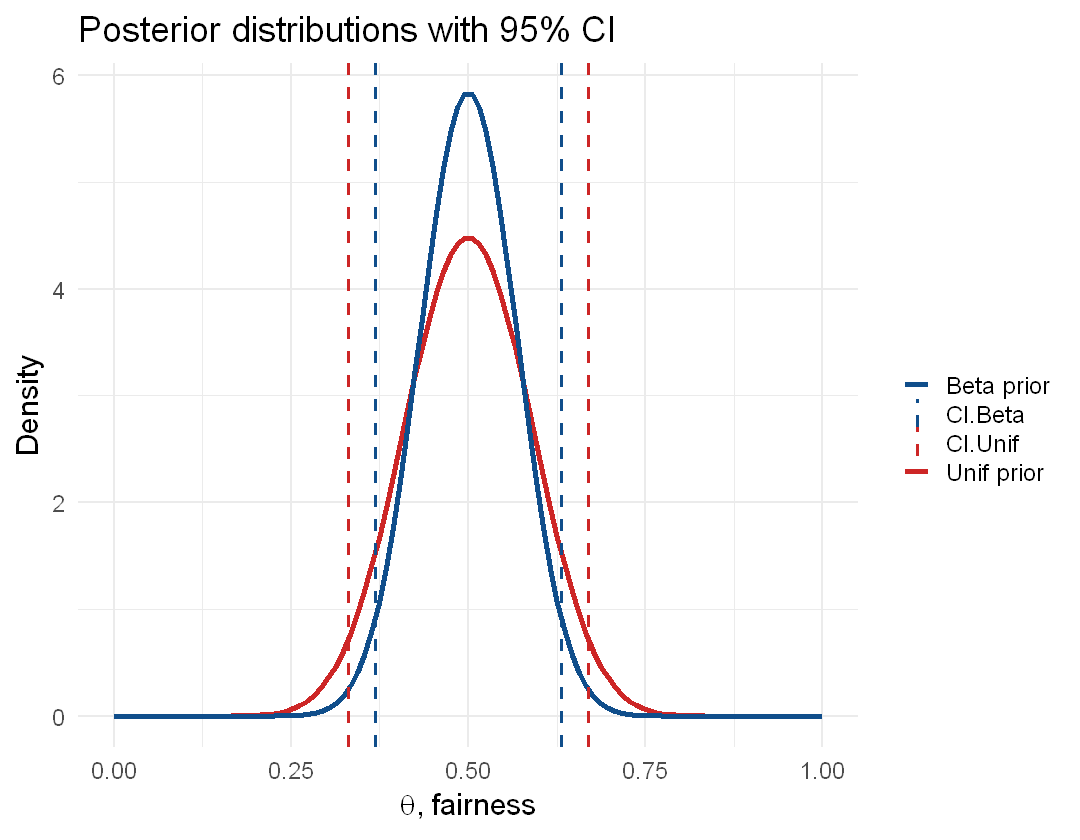

In [21]:
low.ci.unif <- qbeta(0.025, 16, 16)
high.ci.unif <- qbeta(0.975, 16, 16)

low.ci.beta <- qbeta(0.025, 27, 27)
high.ci.beta <- qbeta(0.975, 27, 27)

print(sprintf("95%% CI for Uniform prior: [%.2f, %.2f]", low.ci.unif, high.ci.unif))
print(sprintf("95%% CI for Beta prior: [%.2f, %.2f]", low.ci.beta, high.ci.beta))

options(repr.plot.width = 9, repr.plot.height = 7)

coin.ci.plot <- coin.post.plot + 
	geom_vline(aes(xintercept = low.ci.unif, color = "CI.Unif"), linewidth = 1, linetype='dashed') +
	geom_vline(aes(xintercept = high.ci.unif, color = 'CI.Unif'), linewidth = 1, linetype='dashed') +

	geom_vline(aes(xintercept = low.ci.beta, color = "CI.Beta"), linewidth = 1, linetype='dashed') +
	geom_vline(aes(xintercept = high.ci.beta, color = 'CI.Beta'), linewidth = 1, linetype='dashed') +

	labs(x=TeX(r'(\theta, fairness)'), y='Density', title='Posterior distributions with 95% CI', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Unif prior' = 'firebrick3', 'Beta prior' = 'dodgerblue4', 
		'CI.Unif' = 'firebrick3', 'CI.Beta' = 'dodgerblue4'))

coin.ci.plot


**3.3)**

In [34]:
coin.out <- sample(c(rep(1,times = 15), rep(0, times = 15)))

count_ones <- vector("integer", length(coin.out))
array_length <- vector("integer", length(coin.out))

a.beta.unif <- vector("numeric", length(coin.out))	
b.beta.unif <- vector("numeric", length(coin.out))
a.beta.beta <- vector("numeric", length(coin.out))
b.beta.beta <- vector("numeric", length(coin.out))

# unif.post.arr <- vector("numeric", length(coin.out))
# beta.post.arr <- vector("numeric", length(coin.out))

mean.unif <- vector("numeric", length(coin.out))
mean.beta <- vector("numeric", length(coin.out))

unif.ci.low <- vector("numeric", length(coin.out))
unif.ci.high <- vector("numeric", length(coin.out))
beta.ci.low <- vector("numeric", length(coin.out))
beta.ci.high <- vector("numeric", length(coin.out))

for (i in 1:length(coin.out)) {
	sub_array <- coin.out[1:i]
	count_ones[i] <- sum(sub_array)
	array_length[i] <- length(sub_array)

	a.beta.unif[i] <- 1 + count_ones[i]
	b.beta.unif[i] <- 1 + array_length[i] - count_ones[i]

	a.beta.beta[i] <- 12 + count_ones[i]
	b.beta.beta[i] <- 12 + array_length[i] - count_ones[i]

	x <- seq(0, 1, length.out = 100)

	unif.post <- dbeta(x=x, shape1=a.beta.unif[i], shape2=b.beta.unif[i])
	beta.post <- dbeta(x=x, shape1=a.beta.beta[i], shape2=b.beta.beta[i])

	mean.unif[i] <- a.beta.unif[i] / (a.beta.unif[i] + b.beta.unif[i])
	mean.beta[i] <- a.beta.beta[i] / (a.beta.beta[i] + b.beta.beta[i])

	#   unif.post.arr[i] <- unif.post
	#   beta.post.arr[i] <- beta.post

	unif.ci <- emdbook::ncredint(x, unif.post, level=0.95)
	beta.ci <- emdbook::ncredint(x, beta.post, level=0.95)

	unif.ci.low[i] <- unif.ci[1]
	unif.ci.high[i] <- unif.ci[2]
	beta.ci.low[i] <- beta.ci[1]
	beta.ci.high[i] <- beta.ci[2]

	print(sprintf("For %d flips:", i))
	print(sprintf("Mean for Uniform prior: %.2f", mean.unif[i]))
	print(sprintf("Mean for Beta prior: %.2f", mean.beta[i]))
	print(sprintf("95%% CI for Uniform prior: [%.2f, %.2f]", unif.ci[1], unif.ci[2]))
	print(sprintf("95%% CI for Beta prior: [%.2f, %.2f]", beta.ci[1], beta.ci[2]))
	cat('\n')
}


[1] "For 1 flips:"
[1] "Mean for Uniform prior: 0.67"
[1] "Mean for Beta prior: 0.52"
[1] "95% CI for Uniform prior: [0.00, 0.72]"
[1] "95% CI for Beta prior: [0.33, 0.71]"

[1] "For 2 flips:"
[1] "Mean for Uniform prior: 0.75"
[1] "Mean for Beta prior: 0.54"
[1] "95% CI for Uniform prior: [0.79, 1.00]"
[1] "95% CI for Beta prior: [0.35, 0.72]"

[1] "For 3 flips:"
[1] "Mean for Uniform prior: 0.60"
[1] "Mean for Beta prior: 0.52"
[1] "95% CI for Uniform prior: [0.23, 0.95]"
[1] "95% CI for Beta prior: [0.34, 0.70]"

[1] "For 4 flips:"
[1] "Mean for Uniform prior: 0.67"
[1] "Mean for Beta prior: 0.54"
[1] "95% CI for Uniform prior: [0.33, 0.97]"
[1] "95% CI for Beta prior: [0.36, 0.71]"

[1] "For 5 flips:"
[1] "Mean for Uniform prior: 0.71"
[1] "Mean for Beta prior: 0.55"
[1] "95% CI for Uniform prior: [0.41, 0.98]"
[1] "95% CI for Beta prior: [0.38, 0.73]"

[1] "For 6 flips:"
[1] "Mean for Uniform prior: 0.62"
[1] "Mean for Beta prior: 0.53"
[1] "95% CI for Uniform prior: [0.32, 0.92]"

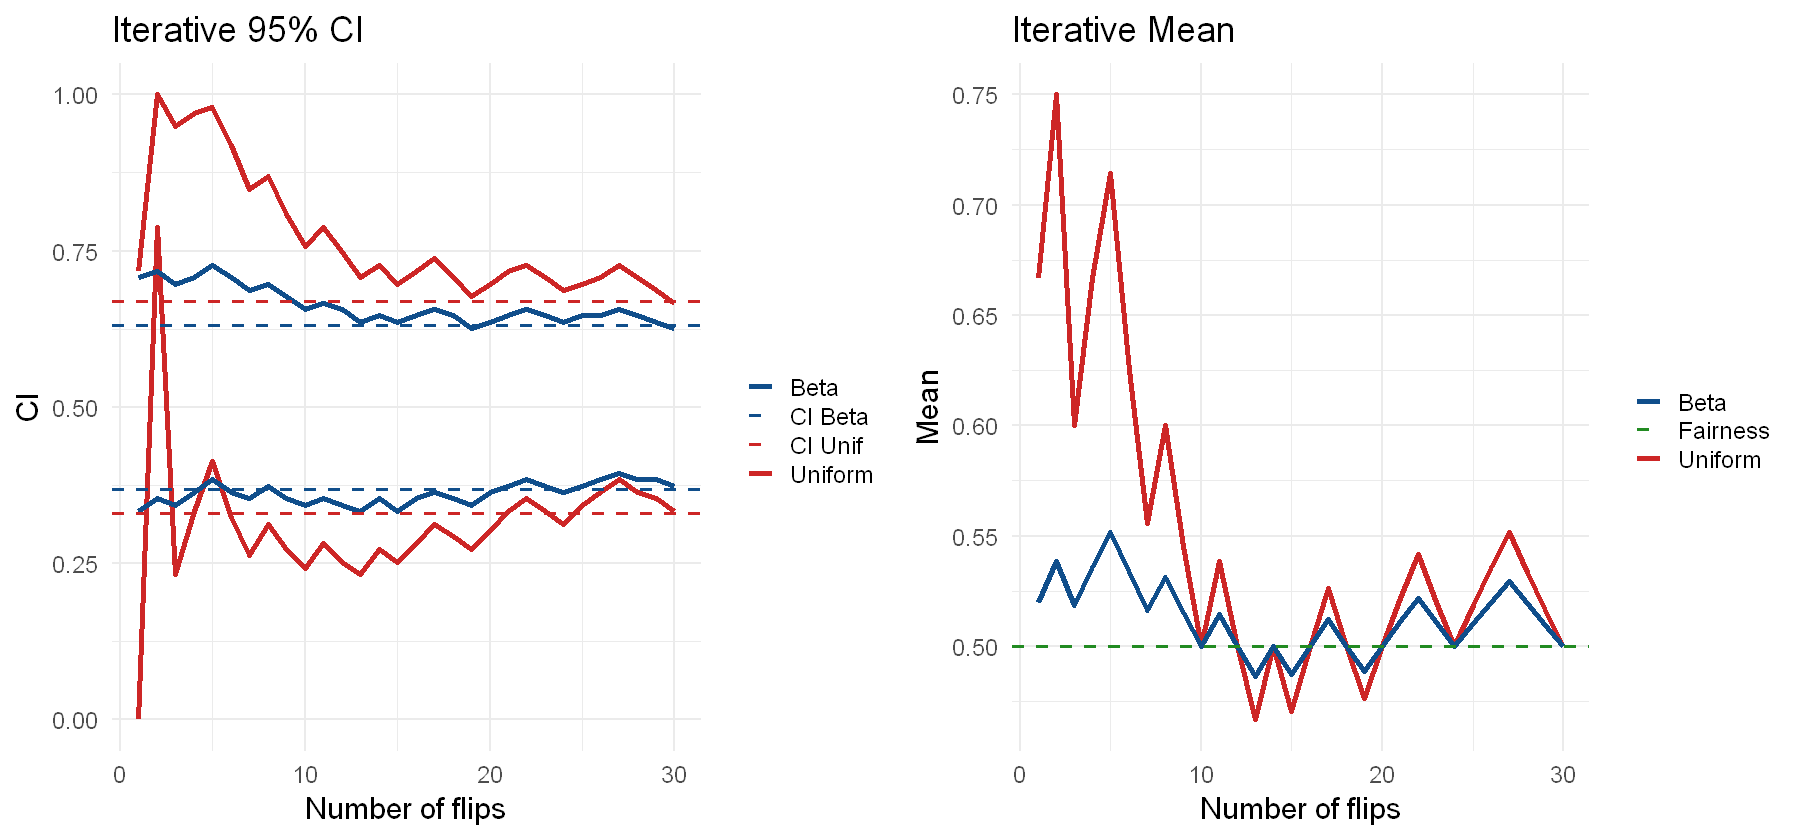

In [38]:
options(repr.plot.width = 15, repr.plot.height = 7)

ciit.coin.plot <- ggplot() + 
	geom_line(aes(x=1:length(coin.out), y=unif.ci.low, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=unif.ci.high, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=beta.ci.low, color='Beta'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=beta.ci.high, color='Beta'), lwd=1.5) +

	geom_hline(aes(yintercept = low.ci.unif, color='CI Unif'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = high.ci.unif, color='CI Unif'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = low.ci.beta, color='CI Beta'), linetype='dashed', lwd=1) +
	geom_hline(aes(yintercept = high.ci.beta, color='CI Beta'), linetype='dashed', lwd=1) +

	labs(x='Number of flips', y='CI', title='Iterative 95% CI', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Beta' = 'dodgerblue4', 'CI Unif' = 'firebrick3', 'CI Beta' = 'dodgerblue4'))

mit.coin.plot <- ggplot() + 
	geom_line(aes(x=1:length(coin.out), y=mean.unif, color='Uniform'), lwd=1.5) +
	geom_line(aes(x=1:length(coin.out), y=mean.beta, color='Beta'), lwd=1.5) +

	geom_hline(aes(yintercept = 0.5, color='Fairness'), linetype='dashed', lwd=1) +

	labs(x='Number of flips', y='Mean', title='Iterative Mean', color='')+
	theme_minimal(base_size = 18) +
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Beta' = 'dodgerblue4', 'Fairness' = 'forestgreen'))

grid.arrange(ciit.coin.plot, mit.coin.plot, nrow=1, ncol = 2)



#### 4)  
**4.1)**